<a href="https://colab.research.google.com/github/dollytwn/nyu-python-public-policy/blob/master/HW_7_Dolly_Wei_Mei_Huang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm # package for doing statistics

In [0]:
# You can use pd.set_option() to make sure you see all the rows and columns in your dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [25]:
drive.mount('/content/drive')
# follow the link it generates, choose your account, and then paste in the authorization code it provides

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#Step 1. 
Select an indicator from the Community District Profiles data that you want to analyze for this assignment. Create a dataframe that only captures the borocd and selected indicator column.

In [27]:
# Data source from Indicators data
indicators_data = pd.read_csv('https://planninglabs.carto.com/api/v2/sql?format=csv&q=SELECT%20cartodb_id,the_geom,the_geom_webmercator,acres,acs_tooltip,acs_tooltip_2,acs_tooltip_3,area_sqmi,borocd,cb_email,cb_website,cd_full_title,cd_short_title,cd_son_fy2018,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_count,crime_count_boro,crime_count_nyc,crime_per_1000,crime_per_1000_boro,crime_per_1000_nyc,female_10_14,female_15_19,female_20_24,female_25_29,female_30_34,female_35_39,female_40_44,female_45_49,female_5_9,female_50_54,female_55_59,female_60_64,female_65_69,female_70_74,female_75_79,female_80_84,female_85_over,female_under_5,fp_100_area,fp_100_bldg,fp_100_cost_burden,fp_100_cost_burden_value,fp_100_mhhi,fp_100_mortg_value,fp_100_openspace,fp_100_ownerocc,fp_100_ownerocc_value,fp_100_permortg,fp_100_pop,fp_100_rent_burden,fp_100_rent_burden_value,fp_100_resunits,fp_500_area,fp_500_bldg,fp_500_cost_burden,fp_500_cost_burden_value,fp_500_mhhi,fp_500_mortg_value,fp_500_openspace,fp_500_ownerocc,fp_500_ownerocc_value,fp_500_permortg,fp_500_pop,fp_500_rent_burden,fp_500_rent_burden_value,fp_500_resunits,lep_rate,lep_rate_boro,lep_rate_nyc,lot_area_commercial_office,lot_area_industrial_manufacturing,lot_area_mixed_use,lot_area_open_space,lot_area_other_no_data,lot_area_parking,lot_area_public_facility_institution,lot_area_res_1_2_family_bldg,lot_area_res_multifamily_elevator,lot_area_res_multifamily_walkup,lot_area_transportation_utility,lot_area_vacant,lots_commercial_office,lots_industrial_manufacturing,lots_mixed_use,lots_open_space,lots_other_no_data,lots_parking,lots_public_facility_institution,lots_res_1_2_family_bldg,lots_res_multifamily_elevator,lots_res_multifamily_walkup,lots_total,lots_transportation_utility,lots_vacant,male_10_14,male_15_19,male_20_24,male_25_29,male_30_34,male_35_39,male_40_44,male_45_49,male_5_9,male_50_54,male_55_59,male_60_64,male_65_69,male_70_74,male_75_79,male_80_84,male_85_over,male_under_5,mean_commute,mean_commute_boro,mean_commute_nyc,moe_bach_deg,moe_bach_deg_boro,moe_bach_deg_nyc,moe_foreign_born,moe_hh_rent_burd,moe_hh_rent_burd_boro,moe_hh_rent_burd_nyc,moe_lep_rate,moe_lep_rate_boro,moe_lep_rate_nyc,moe_mean_commute,moe_mean_commute_boro,moe_mean_commute_nyc,moe_over65_rate,moe_over65_rate_boro,moe_over65_rate_nyc,moe_poverty_rate,moe_under18_rate,moe_under18_rate_boro,moe_under18_rate_nyc,moe_unemnployment,moe_unemployment_boro,moe_unemployment_cd,neighborhoods,over65_rate,over65_rate_boro,over65_rate_nyc,pct_asian_nh,pct_bach_deg,pct_bach_deg_boro,pct_bach_deg_nyc,pct_black_nh,pct_clean_strts,pct_clean_strts_boro,pct_clean_strts_nyc,pct_foreign_born,pct_hh_rent_burd,pct_hh_rent_burd_boro,pct_hh_rent_burd_nyc,pct_hispanic,pct_other_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_acs,pop_change_00_10,poverty_rate,poverty_rate_boro,poverty_rate_nyc,puma,shared_puma,shared_puma_cd,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc%20FROM%20community_district_profiles&filename=indicators.csv', header='infer')
indicators_data.head()


,the_geom,lots_parking,the_geom_webmercator,acres,acs_tooltip,acs_tooltip_2,acs_tooltip_3,area_sqmi,borocd,cb_email,cb_website,cd_full_title,cd_short_title,cd_son_fy2018,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_count,crime_count_boro,crime_count_nyc,crime_per_1000,crime_per_1000_boro,crime_per_1000_nyc,female_10_14,female_15_19,female_20_24,female_25_29,female_30_34,female_35_39,female_40_44,female_45_49,female_5_9,female_50_54,female_55_59,female_60_64,female_65_69,female_70_74,female_75_79,female_80_84,female_85_over,female_under_5,fp_100_area,fp_100_bldg,fp_100_cost_burden,fp_100_cost_burden_value,fp_100_mhhi,fp_100_mortg_value,fp_100_openspace,fp_100_ownerocc,fp_100_ownerocc_value,fp_100_permortg,fp_100_pop,fp_100_rent_burden,fp_100_rent_burden_value,fp_100_resunits,fp_500_area,fp_500_bldg,fp_500_cost_burden,fp_500_cost_burden_value,fp_500_mhhi,fp_500_mortg_value,fp_500_openspace,fp_500_ownerocc,fp_500_ownerocc_value,fp_500_permortg,fp_500_pop,fp_500_rent_burden,fp_500_rent_burden_value,fp_500_resunits,lep_rate,lep_rate_boro,lep_rate_nyc,lot_area_commercial_office,lot_area_industrial_manufacturing,lot_area_mixed_use,lot_area_open_space,lot_area_other_no_data,lot_area_parking,lot_area_public_facility_institution,lot_area_res_1_2_family_bldg,lot_area_res_multifamily_elevator,lot_area_res_multifamily_walkup,lot_area_transportation_utility,lot_area_vacant,lots_commercial_office,lots_industrial_manufacturing,lots_mixed_use,lots_open_space,lots_other_no_data,cartodb_id,lots_public_facility_institution,lots_res_1_2_family_bldg,lots_res_multifamily_elevator,lots_res_multifamily_walkup,lots_total,lots_transportation_utility,lots_vacant,male_10_14,male_15_19,male_20_24,male_25_29,male_30_34,male_35_39,male_40_44,male_45_49,male_5_9,male_50_54,male_55_59,male_60_64,male_65_69,male_70_74,male_75_79,male_80_84,male_85_over,male_under_5,mean_commute,mean_commute_boro,mean_commute_nyc,moe_bach_deg,moe_bach_deg_boro,moe_bach_deg_nyc,moe_foreign_born,moe_hh_rent_burd,moe_hh_rent_burd_boro,moe_hh_rent_burd_nyc,moe_lep_rate,moe_lep_rate_boro,moe_lep_rate_nyc,moe_mean_commute,moe_mean_commute_boro,moe_mean_commute_nyc,moe_over65_rate,moe_over65_rate_boro,moe_over65_rate_nyc,moe_poverty_rate,moe_under18_rate,moe_under18_rate_boro,moe_under18_rate_nyc,moe_unemnployment,moe_unemployment_boro,moe_unemployment_cd,neighborhoods,over65_rate,over65_rate_boro,over65_rate_nyc,pct_asian_nh,pct_bach_deg,pct_bach_deg_boro,pct_bach_deg_nyc,pct_black_nh,pct_clean_strts,pct_clean_strts_boro,pct_clean_strts_nyc,pct_foreign_born,pct_hh_rent_burd,pct_hh_rent_burd_boro,pct_hh_rent_burd_nyc,pct_hispanic,pct_other_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_acs,pop_change_00_10,poverty_rate,poverty_rate_boro,poverty_rate_nyc,puma,shared_puma,shared_puma_cd,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc
0,NaN,23,NaN,976.3,American Community Survey 2013-2017 5-Year Est...,American Community Survey (ACS) 2013-2017 5-ye...,2010 Census population counts for floodplain a...,1.5,101,man01@cb.nyc.gov,www1.nyc.gov/site/manhattancb1/index.page,Manhattan Community District 1,Manhattan CD 1,http://www1.nyc.gov/assets/planning/download/p...,1729,39547,7,1,28,22,1099,25961,96515,15.634252,15.7,11.8,1.1,2.4,4.2,7.3,6.6,4.7,3.5,2.9,1.8,2.2,2.3,2.5,2.3,1.7,1.0,0.7,1.1,2.6,1.78,678,0.284774,2164,121000.0,4900,0.041,0.220593,7599,0.644822,16733,0.353232,7367,19061,2.53,1036,0.284528,2913,118000.0,6272,0.042,0.241982,10238,0.612620,29221,0.350056,8750,28097,5.8,15.5,23.1,7865158,252207,4271043,1453796,5345624,433550,10274554,45535,1746495,185913,4107387,134060,343,78,578,25,11,1,69,33,167,65,1448,33,23,1.4,1.9,2.5,6.0,6.7,5.7,3.7,3.3,1.7,2.8,2.5,2.7,1.9,1.2,0.8,0.7,0.7,2.9,25.2,31.8,40.8,1.0,0.3,0.2,1.1,1.6,0.5,0.3,0.6,0.3,0.1,0.5,0.2,0.1,0.7,0.1,0.1,0.7,0.6,0.1,0.1,0.1,0.2,0.3,"Battery Park City, Civic Center, 

In [28]:
# Indicator: percent clean streets 
# Dataframe: borocd and percent clean streets
clean_streets = indicators_data[['borocd','pct_clean_strts']]
clean_streets.head()

,borocd,pct_clean_strts
0,101,95.4
1,102,96.3
2,103,91.0
3,104,95.6
4,105,94.4


#Step 2. 
Review the complaint types in the 311 complaint data. Choose the complaint type(s) you hypothesize should correlate with the indicator you chose in Step 2. Create a new dataframe that only captures the 311 complaints you want to analyze.

In [29]:
df.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0


In [0]:
# Complaint type: dirty conditions
# Create a dataframe that only captures the borocd and dirty conditions.
dirty_conditions = df[df['complaint_type'] == 'Dirty Conditions']

In [31]:
dirty_conditions.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
112,114,114,39897857,08/01/2018 12:44:00 AM,08/01/2018 12:00:00 PM,DSNY,A - Queens,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,11433,108-36 164 STREET,164 STREET,108 AVENUE,109 AVENUE,NaN,NaN,ADDRESS,Jamaica,NaN,NaN,Closed,NaN,The Department of Sanitation investigated this...,08/01/2018 12:00:00 PM,12 QUEENS,4.101710e+09,QUEENS,1042492.0,193014.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.696264,-73.789965,"(40.696263962693955, -73.78996459099695)",412.0
138,143,143,39892377,08/01/2018 12:56:00 AM,08/04/2018 12:00:00 PM,DSNY,A - Bronx,Dirty Conditions,E3A Dirty Area/Alleyway,Lot,10469,3139 GUNTHER AVENUE,GUNTHER AVENUE,HAMMERSLEY AVENUE,BURKE AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,NaN,The Department of Sanitation investigated this...,08/04/2018 12:00:00 PM,12 BRONX,2.047690e+09,BRONX,1028403.0,257426.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.873139,-73.840350,"(40.8731388816512, -73.84034961214721)",212.0
143,148,148,39892228,08/01/2018 12:59:00 AM,08/04/2018 12:00:00 PM,DSNY,A - Brooklyn,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,11228,1447 85 STREET,85 STREET,14 AVENUE,15 AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,The Department of Sanitation investigated this...,08/04/2018 12:00:00 PM,11 BROOKLYN,3.063230e+09,BROOKLYN,981467.0,162503.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.612709,-74.010024,"(40.612709158270704, -74.01002363167659)",311.0
299,319,319,39896384,08/01/2018 02:43:00 AM,08/07/2018 12:00:00 PM,DSNY,A - Brooklyn,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,11207,583 VAN SICLEN AVENUE,VAN SICLEN AVENUE,LIVONIA AVENUE,NEW LOTS AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,The Department of Sanitation investigated this...,08/07/2018 12:00:00 PM,05 BROOKLYN,3.040880e+09,BROOKLYN,1015218.0,181624.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.665138,-73.888374,"(40.66513849333165, -73.88837373473146)",305.0
319,339,339,39890887,08/01/2018 03:03:00 AM,08/01/2018 12:00:00 PM,DSNY,A - Queens,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,11385,71-19 72 STREET,72 STREET,CENTRAL AVENUE,COOPER AVENUE,NaN,NaN,ADDRESS,Ridgewood,NaN,NaN,Closed,NaN,The Department of Sanitation investigated this...,08/01/2018 12:00:00 PM,05 QUEENS,4.036890e+09,QUEENS,1017744.0,195960.0,ONLINE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704478,-73.879197,"(40.70447830504688, -73.87919734329861)",405.0


#Step 3. 
Write out the hypothesis for your analysis. What relationship are you expecting to find between the variables and why?

In [0]:
# As the dirty conditions increases, the percent clean streets decreases and vice versa

#Step 4. 
Get the count of 311 complaints per community district (borocd) using the filtered dataframe you created in Step 2.



In [33]:
count_dirty_conditions = dirty_conditions.groupby('borocd').size().reset_index(name='count_of_311_requests')
print(len(count_dirty_conditions))

59


In [34]:
print(count_dirty_conditions)

    borocd  count_of_311_requests
0    101.0                    293
1    102.0                    496
2    103.0                    512
3    104.0                    573
4    105.0                    523
5    106.0                    325
6    107.0                    532
7    108.0                    532
8    109.0                    447
9    110.0                    525
10   111.0                    344
11   112.0                    408
12   201.0                    387
13   202.0                    180
14   203.0                    286
15   204.0                    308
16   205.0                    267
17   206.0                    292
18   207.0                    325
19   208.0                    323
20   209.0                    567
21   210.0                    675
22   211.0                    538
23   212.0                    861
24   301.0                   1069
25   302.0                    511
26   303.0                   1212
27   304.0                    645
28   305.0    

#Step 5. 
Join the indicator dataframe (from Step 1) with 311 counts dataframe (from Step 4) using the borocd value.

In [0]:
# merging for 'clean_streets' data frame
dirty_merged_data = pd.merge(left=count_dirty_conditions, right=clean_streets, left_on='borocd', right_on='borocd')

In [36]:
# quick check
dirty_merged_data.head()

,borocd,count_of_311_requests,pct_clean_strts
0,101.0,293,95.4
1,102.0,496,96.3
2,103.0,512,91.0
3,104.0,573,95.6
4,105.0,523,94.4


#Step 6. 
Produce a scatter plot of the indicator values vs. 311 complaint counts. The should be one point per community district.

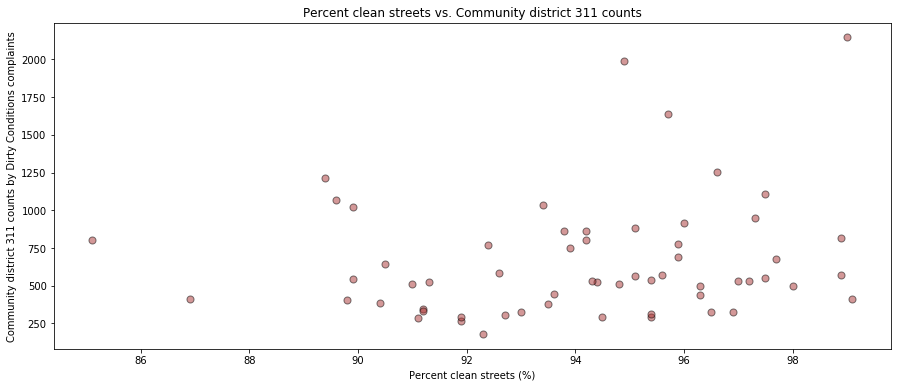

In [37]:
# define the data that will be used
#np.array
x = dirty_merged_data['pct_clean_strts']
y = dirty_merged_data.count_of_311_requests

# define the styling of the scatter plot
color = '#a83232' # color of the circle. hex color picker: https://www.google.com/search?q=color+picker
area = 50 # area of the circle in pixels

plt.figure(figsize=(15, 6))

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 
# s: size, c: color
# edgecolors: outline color of the marker
# alpha: transparency. 0 is 100% transparent. 1 is 100% opaque

plt.title('Percent clean streets vs. Community district 311 counts')
plt.xlabel('Percent clean streets (%)')
plt.ylabel('Community district 311 counts by Dirty Conditions complaints') 

plt.show()

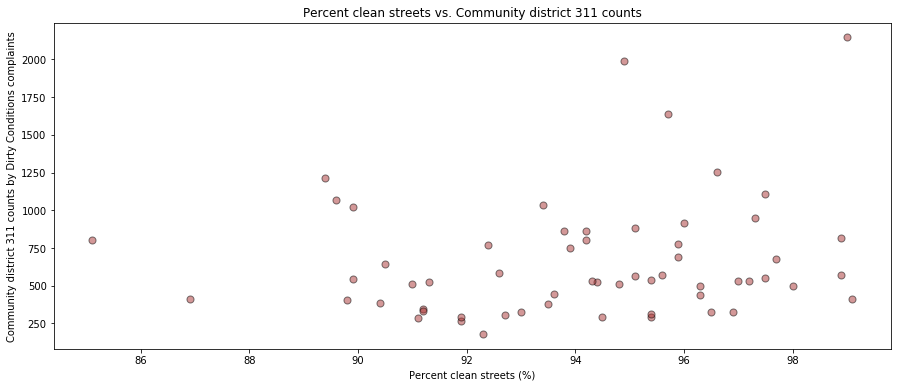

In [38]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(dirty_merged_data['pct_clean_strts']), # x
    np.array(dirty_merged_data.count_of_311_requests), # y
    s=50, # size of marker
    c='#a83232', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) 

plt.title('Percent clean streets vs. Community district 311 counts')
plt.xlabel('Percent clean streets (%)')
plt.ylabel('Community district 311 counts by Dirty Conditions complaints')

plt.show()

#Step 7. 
Conduct an OLS linear regression using the indicator values vs. 311 complaint counts and interpret the results.

In [39]:
# determine the correlation coefficient using the np.corrcoef() function from numpy

x = np.array(dirty_merged_data['pct_clean_strts'])
y = np.array(dirty_merged_data.count_of_311_requests)

# produces a matrix of the correlation coefficients
np.corrcoef(x, y)

array([[1.        , 0.17409284],
       [0.17409284, 1.        ]])

In [40]:
# Note that y is the first argument, before x. This is different than plotting and the correlation function.

# y = dependent variable (Number of 311 Homeless Service Requests)
y = np.array(dirty_merged_data.count_of_311_requests)

# x = independent variable (Number of Shelters) with a constant added
x = np.array(dirty_merged_data['pct_clean_strts'])
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

# Print out the statistics

print(model.summary())

[[ 1.  95.4]
 [ 1.  96.3]
 [ 1.  91. ]
 [ 1.  95.6]
 [ 1.  94.4]
 [ 1.  96.5]
 [ 1.  97. ]
 [ 1.  97.2]
 [ 1.  93.6]
 [ 1.  91.3]
 [ 1.  91.2]
 [ 1.  89.8]
 [ 1.  90.4]
 [ 1.  92.3]
 [ 1.  91.1]
 [ 1.  92.7]
 [ 1.  91.9]
 [ 1.  91.9]
 [ 1.  93. ]
 [ 1.  96.9]
 [ 1.  95.1]
 [ 1.  97.7]
 [ 1.  95.4]
 [ 1.  93.8]
 [ 1.  89.6]
 [ 1.  94.8]
 [ 1.  89.4]
 [ 1.  90.5]
 [ 1.  89.9]
 [ 1.  95.9]
 [ 1.  92.6]
 [ 1.  89.9]
 [ 1.  91.2]
 [ 1.  97.5]
 [ 1.  93.9]
 [ 1.  85.1]
 [ 1.  94.5]
 [ 1.  92.4]
 [ 1.  94.2]
 [ 1.  86.9]
 [ 1.  94.2]
 [ 1.  93.4]
 [ 1.  96. ]
 [ 1.  93.5]
 [ 1.  94.3]
 [ 1.  95.4]
 [ 1.  95.7]
 [ 1.  98.9]
 [ 1.  97.3]
 [ 1.  98. ]
 [ 1.  95.1]
 [ 1.  95.9]
 [ 1.  99.1]
 [ 1.  94.9]
 [ 1.  97.5]
 [ 1.  96.3]
 [ 1.  96.6]
 [ 1.  98.9]
 [ 1.  99. ]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0

In [0]:
# R-squared: 0.030
# correlation is very weak 

#Step 8. 
Use the linear regression results to add a line of best fit to your scatterplot

In [42]:
p = model.params # intercept and coefficient
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: [-1436.30239632    22.3041986 ]
R2: 0.030308316687680636


In [43]:
# let's make labels for the lines of the best fit to use on a scatter plot

label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = 22.3x + -1436.3; R2 = 0.03


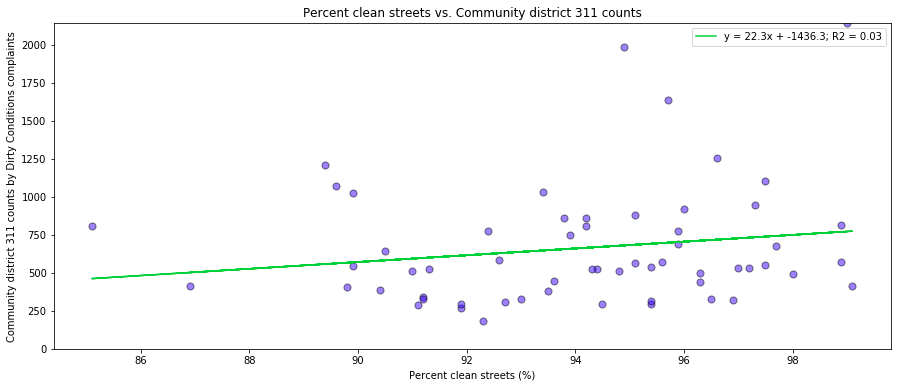

In [44]:
# create an array of x values for the lines of best fit
x_dummy = np.array(dirty_merged_data['pct_clean_strts'])

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(dirty_merged_data['pct_clean_strts']), # x
    np.array(dirty_merged_data.count_of_311_requests), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

# line of best fit, with y intercept
plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138', # lighter green
    label=label)

plt.ylim(0, max(np.array(dirty_merged_data.count_of_311_requests)))

plt.title('Percent clean streets vs. Community district 311 counts')
plt.xlabel('Percent clean streets (%)')
plt.ylabel('Community district 311 counts by Dirty Conditions complaints')
plt.legend()

plt.show()

#Step 9. 
Write a paragraph explaining the results of your analysis? Have you found a meaningful relationship?

The relationship between percent clean streets and dirty conditions is not meaningful because the correlation R-squared is very low, close to 0. This is surprising because I thought that the higher the dirty conditions, the lower the percent clean streets as many streets in the city are pretty dirty and filled with dog poop. >_<''